<a href="https://colab.research.google.com/github/inabinash/BASIC-FACTS/blob/main/PanopticSegmentationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install transformers

In [6]:
!pip install timm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.1 MB/s eta 0:00:00


In [7]:
import io
import requests
from PIL import Image
import torch
import numpy

In [8]:
from transformers import DetrFeatureExtractor, DetrForSegmentation

In [9]:
DetrFeatureExtractor

transformers.models.detr.feature_extraction_detr.DetrFeatureExtractor

In [10]:
DetrFeatureExtractor

transformers.models.detr.feature_extraction_detr.DetrFeatureExtractor

In [11]:
from transformers.models.detr.feature_extraction_detr import rgb_to_id

In [12]:
feature_extractor = DetrFeatureExtractor.from_pretrained("facebook/detr-resnet-50-panoptic")

/usr/local/lib/python3.10/dist-packages/transformers/models/detr/feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [13]:
feature_extractor

DetrFeatureExtractor {
  "do_normalize": true,
  "do_pad": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "DetrFeatureExtractor",
  "format": "coco_panoptic",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "DetrFeatureExtractor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "longest_edge": 1333,
    "shortest_edge": 800
  }
}

In [14]:
model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")

Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [16]:
inputs = feature_extractor(images=image, return_tensors="pt")

In [17]:
inputs

{'pixel_values': tensor([[[[ 0.2796,  0.3138,  0.3481,  ..., -0.2856, -0.3369, -0.3712],
          [ 0.2624,  0.2967,  0.3309,  ..., -0.2342, -0.3369, -0.4054],
          [ 0.2453,  0.2796,  0.3138,  ..., -0.1486, -0.3369, -0.4739],
          ...,
          [ 1.8208,  1.7865,  1.7523,  ..., -0.3541, -0.4911, -0.5938],
          [ 1.9064,  1.9235,  1.9578,  ..., -0.6452, -0.7137, -0.7650],
          [ 1.9578,  2.0092,  2.0948,  ..., -0.8507, -0.8678, -0.8678]],

         [[-1.5980, -1.5980, -1.5980,  ..., -1.8081, -1.8431, -1.8606],
          [-1.6155, -1.5980, -1.5980,  ..., -1.7731, -1.8081, -1.8431],
          [-1.6506, -1.6155, -1.5805,  ..., -1.7381, -1.7731, -1.8081],
          ...,
          [-0.5651, -0.6001, -0.6352,  ..., -1.9482, -1.9132, -1.8782],
          [-0.3901, -0.3725, -0.3375,  ..., -1.7381, -1.7731, -1.7906],
          [-0.2850, -0.2150, -0.1275,  ..., -1.5980, -1.6856, -1.7381]],

         [[-0.8284, -0.7587, -0.6367,  ..., -1.1247, -1.1944, -1.2293],
          [-0

In [18]:
outputs = model(**inputs)

In [19]:
outputs.logits

tensor([[[-18.1565,  -1.7568, -13.5029,  ..., -18.1412, -17.5666,  13.0900],
         [-16.8888,  -1.4138, -14.1028,  ..., -16.3841, -16.2431,  13.3381],
         [-17.5709,  -2.5080, -11.8654,  ..., -16.9370, -16.9015,  13.5036],
         ...,
         [-18.4712,  -2.3563, -15.8813,  ..., -18.4648, -18.1001,  13.1995],
         [-18.8968,  -0.3910, -12.1402,  ..., -18.2435, -18.6408,  13.1864],
         [-16.9737,  -3.5816, -14.8692,  ..., -17.2663, -16.6699,  13.0434]]],
       grad_fn=<ViewBackward0>)

In [20]:
processed_sizes = torch.as_tensor(inputs["pixel_values"].shape[-2:]).unsqueeze(0)
result = feature_extractor.post_process_panoptic(outputs, processed_sizes)[0]
result

`post_process_panoptic is deprecated and will be removed in v5 of Transformers, please use `post_process_panoptic_segmentation`.
/usr/local/lib/python3.10/dist-packages/transformers/models/detr/image_processing_detr.py:1549: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  np_seg_img = torch.ByteTensor(torch.ByteStorage.from_buffer(seg_img.tobytes()))


{'png_string': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04*\x00\x00\x03 \x08\x02\x00\x00\x00j\x0b\x14u\x00\x00C\x8fIDATx\x9c\xed\xdd\xe9\x96\xdb\xb6\xb2\x06Pu\xdc~\xff\x07\xb6|}\x7f\xe8D\x91%\x8a\xe2\x80\xa1P\xd8{ee9N\x0f\x94\x04\x02\xf8X\x00\xf9\xf5}\x01\x00\xd6\\{\x1f\x00\x8b\xees\x98\xe2\x1fP\xaf\xd9\xd1\xca\x0b1a#\x8d\x7fz\x1f\x00\x00\x000\x0bY\x1a\x00vX\x198\x15I\x1a\xab\xf7\x86_\xcd\x90\xa0\x9a/g\x17\x00A\xbc\x9bM\x0e4TI \x99\x14ix\xf7&\xf1\xf1\xa7}l<\x03\x9d\x08\xb0B\xfc\x00\xa0\x9b]\x93\xf5\x81\x06,!$\x933\r\xef\xa9%,\xfe\xa8\xbd\xade\xa0\x13\x01\x16\x89\x1f\x00tS|\xe2\xb5\xfdJsm\x12H2[Z\xd4\x96\x0f\xbd\xc8v\xf9\xee\xcd\x1b\xce\x10?\x00\xe8\xe6\xfc\x0cl\xd7\x84\xaf\r\xc1#\xabh\xdb~L\xe1\x18\x94\xf8\x01@7\xed\'m\xe7\xd7\xdf/\xfe(\x91c\x12\xe7?\xf4"\xeb\xaf>\xfe\xc0\x15q*\x84LK\xfc\x00\xa0\x9b\xee\xb3\xf6z\x0f\x8e\x80EUK(\x87\x7fx\xd9\xd9\xe0\xb5\xc2\xcf$\x13\xf1\x03\x80\x9e\xcc\xfb\t\xabF\x81\xab\xd9\n\xae\xed\xab\x13\x9f\xbe\xe5\xd1\xbb\xad\xf3i\x9e\xf3H\x17\xe2\x07\x00\x

In [21]:
panoptic_seg = Image.open(io.BytesIO(result["png_string"]))


In [22]:
panoptic_seg = numpy.array(panoptic_seg, dtype=numpy.uint8)

In [23]:
panoptic_seg

array([[[4, 0, 0],
        [4, 0, 0],
        [4, 0, 0],
        ...,
        [4, 0, 0],
        [4, 0, 0],
        [4, 0, 0]],

       [[4, 0, 0],
        [4, 0, 0],
        [4, 0, 0],
        ...,
        [4, 0, 0],
        [4, 0, 0],
        [4, 0, 0]],

       [[4, 0, 0],
        [4, 0, 0],
        [4, 0, 0],
        ...,
        [4, 0, 0],
        [4, 0, 0],
        [4, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
image_path = '/content/drive/MyDrive/All_data/Raw_images/amritmahal/a2.jpg'

In [26]:
image = Image.open(image_path)

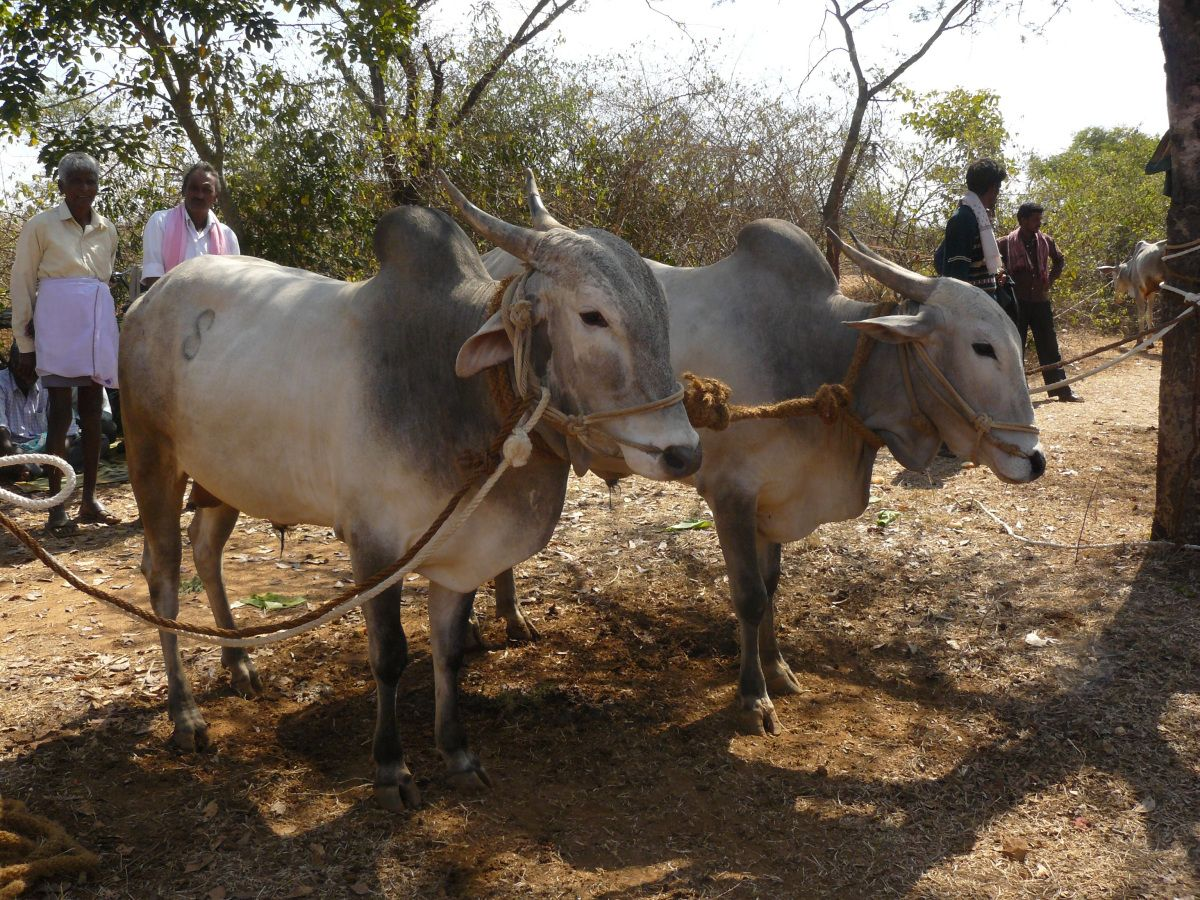

In [42]:
image

In [27]:
input_tensor = feature_extractor(images=image, return_tensors="pt")

In [28]:
input_tensor

{'pixel_values': tensor([[[[ 1.4098,  0.9817, -0.6794,  ..., -1.5185, -1.5528, -1.6042],
          [ 1.7694,  1.5125,  0.4851,  ..., -1.4843, -1.5185, -1.5528],
          [ 1.4269,  1.0844,  0.3138,  ..., -1.5185, -1.5357, -1.5699],
          ...,
          [-0.2171, -0.3027, -0.5424,  ..., -0.0458, -0.5424, -0.7993],
          [-0.2513, -0.3883, -0.5767,  ..., -0.0458, -0.0972, -0.0972],
          [-0.3712, -0.5767, -0.6965,  ..., -0.5596, -0.5767, -0.5938]],

         [[ 2.0259,  1.5357, -0.2675,  ..., -1.4930, -1.5630, -1.6155],
          [ 2.2885,  2.0084,  0.8880,  ..., -1.4580, -1.5105, -1.5630],
          [ 1.8508,  1.4832,  0.6779,  ..., -1.4930, -1.5280, -1.5805],
          ...,
          [-0.6176, -0.7052, -0.9678,  ..., -0.2150, -0.7227, -0.9853],
          [-0.6527, -0.7927, -1.0028,  ..., -0.2150, -0.2675, -0.2675],
          [-0.7752, -0.9853, -1.1253,  ..., -0.7402, -0.7577, -0.7752]],

         [[ 1.3328,  1.0017, -0.5147,  ..., -1.2467, -1.2990, -1.3513],
          [ 1

In [29]:
outputs = model(**input_tensor)

In [30]:
outputs.logits

tensor([[[-1.7844e+01,  6.9923e-01, -9.0693e+00,  ..., -1.6720e+01,
          -1.6814e+01,  1.1196e+01],
         [-1.5804e+01,  7.3897e-01, -5.1881e+00,  ..., -1.5908e+01,
          -1.5676e+01,  1.0358e+01],
         [-1.5333e+01,  1.1430e+00, -8.2125e+00,  ..., -1.4268e+01,
          -1.4269e+01,  9.9387e+00],
         ...,
         [-1.4473e+01,  1.0388e+00, -4.3374e+00,  ..., -1.3836e+01,
          -1.2817e+01,  8.0678e+00],
         [-1.4388e+01,  7.1288e+00, -6.7056e+00,  ..., -1.3541e+01,
          -1.3518e+01,  8.4343e+00],
         [-1.6686e+01, -1.3120e-02, -6.2647e+00,  ..., -1.6443e+01,
          -1.6013e+01,  1.0963e+01]]], grad_fn=<ViewBackward0>)

In [31]:
processed_sizes = torch.as_tensor(input_tensor["pixel_values"].shape[-2:]).unsqueeze(0)
result = feature_extractor.post_process_panoptic(outputs, processed_sizes)[0]
result

{'png_string': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04*\x00\x00\x03 \x08\x02\x00\x00\x00j\x0b\x14u\x00\x004\xddIDATx\x9c\xed\xdd\xedv\xdb6\xba\xb0a:M={\xcf\x9c\xff\xa1\xce\xbc\xb3S\'y\x7f\xa8U\x15K\xa2\xf8\x01<x\x00\\\xd7\xca\xeaJR\xc7\xa6d\x99\xc2M\x80\xe4\xdb\xfb\x02\xc0\x08~\xb6\xde\x00\x00\xba\xf3\x16\xfe\x15\xbf\x84\x7fE\x00\x00`R\xf2\x03\x00\x00\x08\xf2\xb5\xf5\x06\x00l\xf5iqQ\xfc|1\x00p\x92\xd9\x0f\xa0\x0f\xf7\'6\xfct\xb6\x03\x00\x9c\xd0\xe4@\x9e\xfc\x00:\xb0\x92\x19"\x04\x00:b\xf1\x15\x90\xdd\x96\xba\xb8\xfd\x18\x8b\xb2\x00 -\xb3\x1f@^\xc7f6L\x86\x00@Z\xf2\x03\xc8\xe8\xe4\x92*\x05\x02\x009\xc9\x0f \x9d"\xf1\xa0@\x00 !\xf9\x01\x00\x00\x04\x91\x1f\x00\x00@\x10\xf9\x01\x00\x00\x04\x91\x1f\x00\x00@\x10\xf9\x01\x00t\xef\xcd=\x7f\xa0\x13n;\x08\x8c\xc9@\x04\xa6\xe2bw\xd0\x0b\xb3\x1f\x00#0\xf6\x02\xa0\x0b\xf2\x03H\xc7\xc4\x05\x00\x8cJ~\x00\x03\x120\x00\x90\x93\xfc\x002\xd2\x0f\xbbXy\x05\xc0\x01M\xde>\xe4\x07\x00\x00\x10D~\x00\xa31s\x02\x00i\xc9\x0f \xa9c\x151a{Xy\x05@G\xe4\x0

In [34]:
result["segments_info"]

[{'id': 0, 'isthing': True, 'category_id': 1, 'area': 3469},
 {'id': 1, 'isthing': True, 'category_id': 31, 'area': 3204},
 {'id': 2, 'isthing': True, 'category_id': 1, 'area': 1975},
 {'id': 3, 'isthing': True, 'category_id': 1, 'area': 3430},
 {'id': 4, 'isthing': True, 'category_id': 21, 'area': 64329},
 {'id': 5, 'isthing': False, 'category_id': 187, 'area': 45810},
 {'id': 6, 'isthing': False, 'category_id': 184, 'area': 187871},
 {'id': 7, 'isthing': True, 'category_id': 1, 'area': 4993},
 {'id': 8, 'isthing': False, 'category_id': 194, 'area': 354165},
 {'id': 9, 'isthing': True, 'category_id': 21, 'area': 3639},
 {'id': 10, 'isthing': True, 'category_id': 21, 'area': 6905},
 {'id': 11, 'isthing': True, 'category_id': 1, 'area': 17776},
 {'id': 12, 'isthing': True, 'category_id': 21, 'area': 149552},
 {'id': 13, 'isthing': True, 'category_id': 1, 'area': 5682}]

In [39]:
segmented_image = Image.open(io.BytesIO(result["png_string"]))

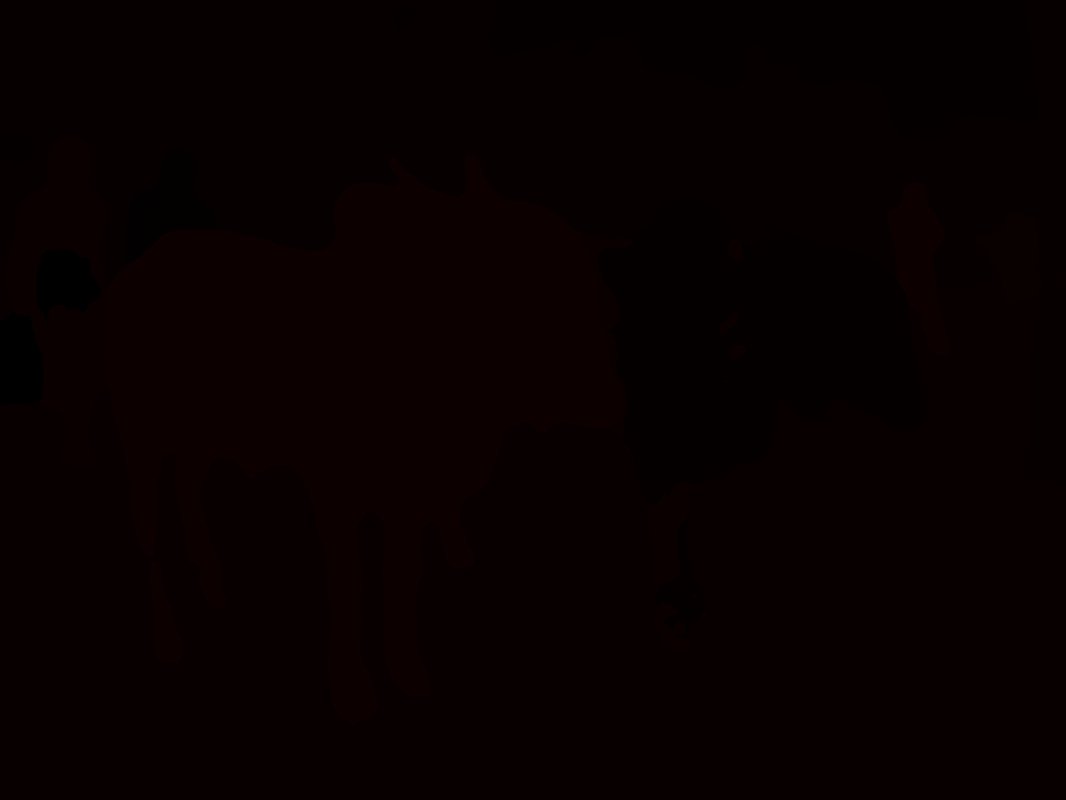

In [41]:
 segmented_image= numpy.array(segmented_image, dtype=numpy.uint8)
 segmented_image

array([[[6, 0, 0],
        [6, 0, 0],
        [6, 0, 0],
        ...,
        [6, 0, 0],
        [6, 0, 0],
        [6, 0, 0]],

       [[6, 0, 0],
        [6, 0, 0],
        [6, 0, 0],
        ...,
        [6, 0, 0],
        [6, 0, 0],
        [6, 0, 0]],

       [[6, 0, 0],
        [6, 0, 0],
        [6, 0, 0],
        ...,
        [6, 0, 0],
        [6, 0, 0],
        [6, 0, 0]],

       ...,

       [[8, 0, 0],
        [8, 0, 0],
        [8, 0, 0],
        ...,
        [8, 0, 0],
        [8, 0, 0],
        [8, 0, 0]],

       [[8, 0, 0],
        [8, 0, 0],
        [8, 0, 0],
        ...,
        [8, 0, 0],
        [8, 0, 0],
        [8, 0, 0]],

       [[8, 0, 0],
        [8, 0, 0],
        [8, 0, 0],
        ...,
        [8, 0, 0],
        [8, 0, 0],
        [8, 0, 0]]], dtype=uint8)

In [42]:
 panoptic_seg_id= rgb_to_id(panoptic_seg)panoptic_seg_id

/usr/local/lib/python3.10/dist-packages/transformers/models/detr/feature_extraction_detr.py:28: FutureWarning: rgb_to_id has moved and will not be importable from this module from v5. Please import from transformers.image_transforms instead.
  warnings.warn(


In [44]:
panoptic_seg_id.shape

(800, 1066)

In [45]:
panoptic_seg_id

array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)